# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [4]:
#Importando base de dados
dados = pd.read_csv('df_encoded.csv')
dados= dados.drop('Unnamed: 0', axis=1)
dados.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,0,58.832877,3.106849,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,0,1,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
2,1,0,1,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
3,0,1,1,0,46.224658,2.106849,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
4,1,1,0,0,29.230137,3.021918,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [5]:
X = dados.drop('mau',axis=1)
X

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,0,58.832877,3.106849,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,0,1,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
2,1,0,1,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
3,0,1,1,0,46.224658,2.106849,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
4,1,1,0,0,29.230137,3.021918,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,1,0,1,0,54.109589,9.884932,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
16646,1,0,1,0,43.389041,7.380822,1,1,1,0,...,1,1,0,0,0,1,0,0,0,0
16647,0,1,1,0,30.005479,9.800000,1,1,0,0,...,1,1,0,0,0,1,0,0,0,0
16648,0,1,1,0,30.005479,9.800000,1,1,0,0,...,1,1,0,0,0,1,0,0,0,0


In [6]:
y = dados.mau
y

0        False
1        False
2        False
3        False
4        False
         ...  
16645     True
16646     True
16647     True
16648     True
16649     True
Name: mau, Length: 16650, dtype: bool

In [7]:
y.value_counts()

False    16260
True       390
Name: mau, dtype: int64

In [8]:
# Separando dados de teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [9]:
#1.Defina um objeto com a função da árvore de decisão vista em aula.
clf = DecisionTreeClassifier(random_state=100)

In [10]:
#2.Treine o modelo com os dados que você separou para treinamento.
clf = clf.fit(X_train,y_train)

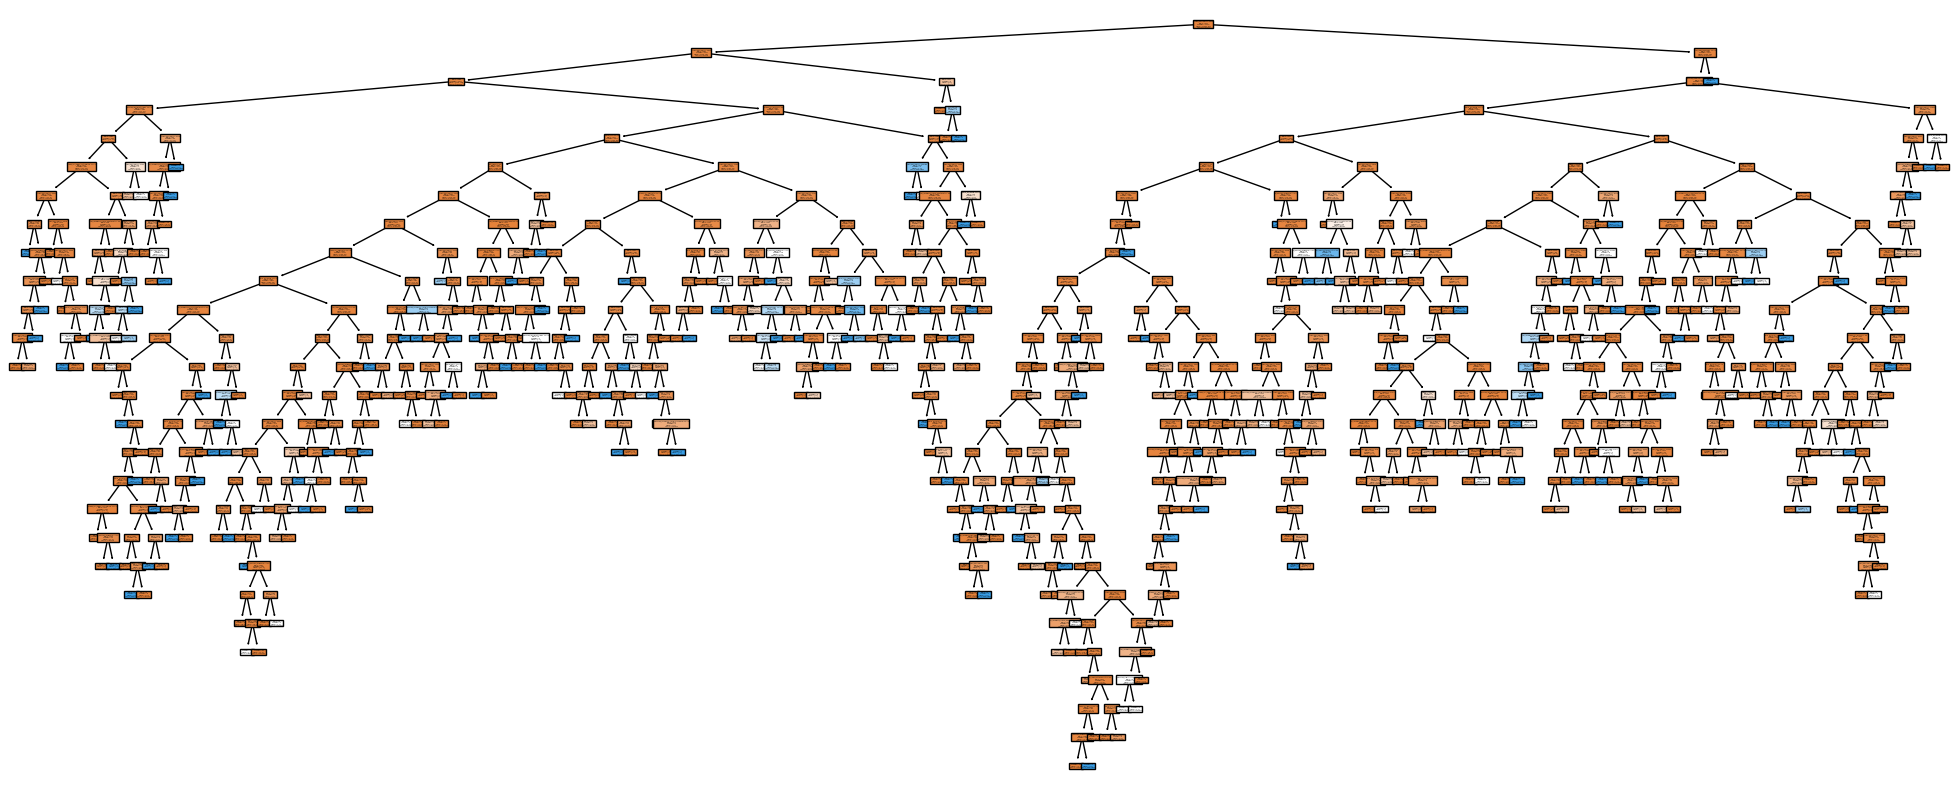

In [11]:
#3.Visualize a árvore. Talvez você queira aumentar um pouco a figura.
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['aprovados', 'reprovados'],
          feature_names=X.columns);

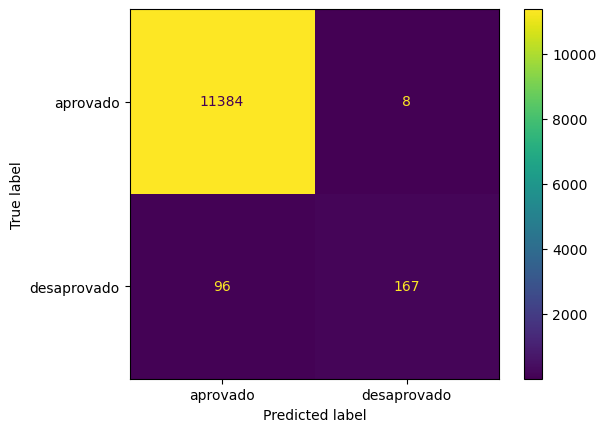

In [17]:
#4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito

ConfusionMatrixDisplay.from_estimator(clf, X_train,y_train, display_labels=['aprovado', 'desaprovado']);
plt.show()

In [18]:
#5.Calcule a acurácia na base de treinamento
predict = clf.predict(X_train)
accuracy_score(y_train, predict)

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [19]:
#1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.

predict_test = clf.predict(X_test)
np.unique(predict_test,return_counts=True) #verificando quantos aprovados e desaprovados

(array([False,  True]), array([4897,   98], dtype=int64))

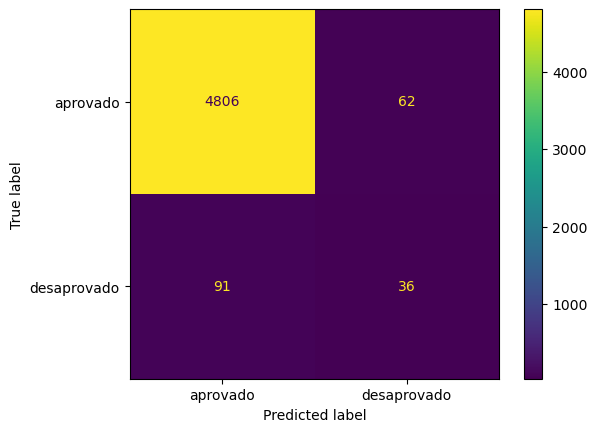

In [21]:
#2. Produza a visualização da matriz de confusão para a base de teste
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['aprovado', 'desaprovado']);
plt.show()

In [22]:
#3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
accuracy_score(y_test, predict_test)

0.9693693693693693

A acurácia do treino foi de 99% enquanto no teste ela caiu para 97%, ainda assim um valor muito alto. O número de maus pagadores na base de dados é muito pequeno em comparação aos bons pagadores, mesmo no caso de acontecer do modelo classificar todos como bons pagadores e errar todos os maus pagadores a acurácia ainda seria alta em torno dos 97%

In [23]:
#4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. 
# Use o random_state = 123. Avalie a matriz de classificação. 
# Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?

clf2 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf2 = clf2.fit(X_train,y_train)

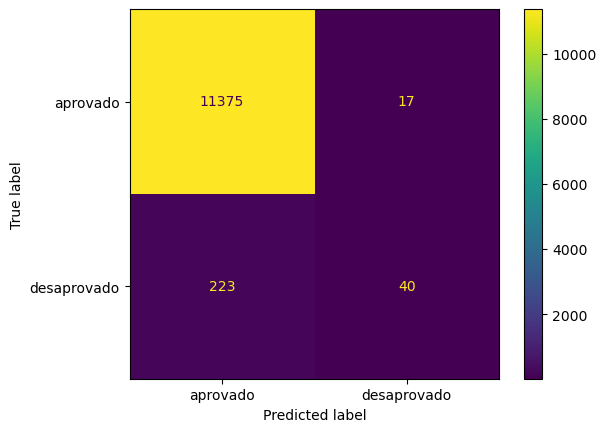

In [24]:
ConfusionMatrixDisplay.from_estimator(clf2, X_train, y_train, display_labels=['aprovado', 'desaprovado']);
plt.show()

Neste segundo modelo de árvore, com os dados de testes, a acurácia foi menor que a do modelo anterior, ou seja, ocorreram mais erros. O número de acertos dos "desaprovados" caiu muito comparado ao modelo anterior.

In [30]:
maus_proponentes = np.unique(predict,return_counts=True) [1][1]
total_proponentes = X_train.shape[0]
maus_proponentes/total_proponentes

0.015015015015015015

5- Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

A acurácia do modelo seria 100%, porém o modelo não saberá classificar um cliente "mau pagador".